In [1]:
#!/usr/bin/env python3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

file_path = "../data/pokemon/"

file_combats = "combats.csv"
file_pokemon = "pokemon.csv"
file_tests = "tests.csv"

pokemon = pd.read_csv(file_path + file_pokemon)

In [2]:
combats = pd.read_csv(file_path + file_combats)

In [3]:
combats.head(20)

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
5,657,752,657
6,192,134,134
7,73,545,545
8,220,763,763
9,302,31,31


In [4]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [5]:
pokemon.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [5]:
#Data Exploration

In [6]:
def myUnique(data_column):
    temp = []
    for i in data_column:
        if i not in temp:
            temp.append(i)
    return(temp)

In [7]:
pokemon = pokemon.dropna()
#pokemon["Type 2"].value_counts()


In [66]:
pokemon_types = np.unique(pokemon["Type 1"])
pokemon_types2 = myUnique(pokemon["Type 2"])
for i in pokemon_types:
    if i in pokemon_types2:
        pass
    else:
        print("%s from Type 1 is not in Type 2" % i)
for i in pokemon_types2:
    if i in pokemon_types:
        pass
    else:
        print("%s from Type 2 is not in Type 1" % i)

In [80]:
def getBattles(mydata,columns=["Type 1","Type 2"]):
    battles = []
    for i in mydata.index:
        temp = [mydata[columns[0]][i],mydata[columns[1]][i]]
        temp.sort()
        battles.append(''.join(temp))
    mydata["Battles"] = battles
    return(mydata)

In [84]:
pokemon = getBattles(pokemon)

In [83]:
test["Battles"].value_counts()

FlyingNormal       24
GrassPoison        15
BugFlying          14
BugPoison          13
GroundWater        10
RockWater          10
GhostGrass         10
GroundRock          9
DragonFlying        8
DragonGround        7
PsychicSteel        7
BugSteel            7
FlyingWater         7
FightingFire        7
RockSteel           6
FireFlying          6
FightingPsychic     6
FlyingPsychic       6
IceWater            6
FairyPsychic        6
BugGrass            6
DarkWater           6
FairyNormal         5
BugRock             5
DarkFlying          5
ElectricFlying      5
FlyingGrass         5
PsychicWater        5
GhostPoison         4
GhostSteel          4
                   ..
DragonWater         2
DragonRock          2
GhostGround         2
GroundPsychic       2
GrassRock           2
DragonGhost         2
GhostPsychic        1
BugGhost            1
ElectricFairy       1
ElectricFire        1
FlyingSteel         1
SteelWater          1
FireRock            1
ElectricGhost       1
NormalWate

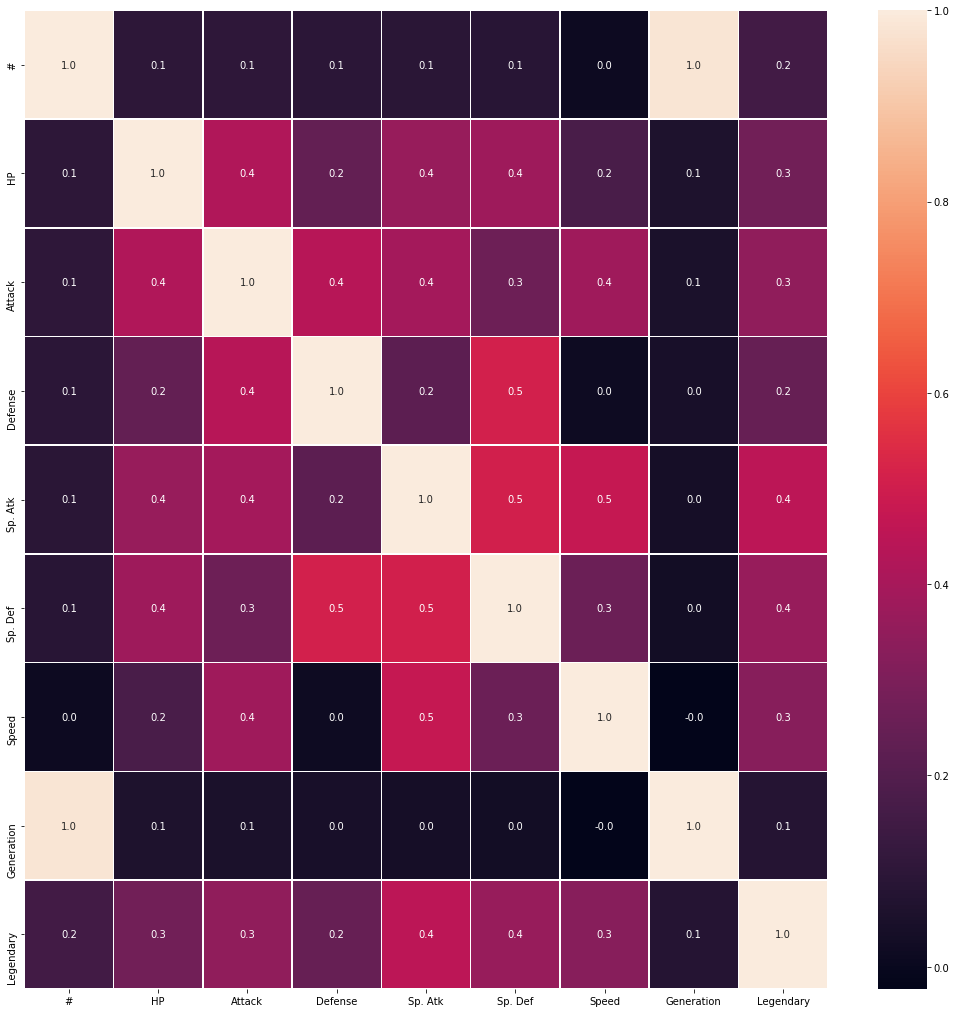

In [14]:
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(pokemon.corr(), annot=True,linewidths=.5,fmt='.1f',ax=ax)

In [85]:
def getDifferences(first_pokemon,second_pokemon,winner,mydata,num_columns):
    temp = pd.dataframe()
    if first_pokemon == winner:
        loser = second_pokemon
    else:
        loser = first_pokemon
    for i in num_columns:
        temp[i] = mydata[i][winner] - mydata[i][loser]
    return(temp)

def getBinaries(mydata,column,prefix):
    for i in np.unique(mydata[column]):
        mydata[str(prefix+i)] = [1 if x == i else 0 for x in mydata[column]]
    return(mydata)
        

In [86]:
pokemon = getBinaries(pokemon,"Battles")

In [91]:
pokemon.head(20)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,IceWater,NormalPsychic,NormalWater,PoisonWater,PsychicRock,PsychicSteel,PsychicWater,RockSteel,RockWater,SteelWater
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,...,0,0,0,0,0,0,0,0,0,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,...,0,0,0,0,0,0,0,0,0,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,...,0,0,0,0,0,0,0,0,0,0
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,...,0,0,0,0,0,0,0,0,0,0
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,...,0,0,0,0,0,0,0,0,0,0
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,...,0,0,0,0,0,0,0,0,0,0
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,...,0,0,0,0,0,0,0,0,0,0
15,16,Butterfree,Bug,Flying,60,45,50,90,80,70,...,0,0,0,0,0,0,0,0,0,0
16,17,Weedle,Bug,Poison,40,35,30,20,20,50,...,0,0,0,0,0,0,0,0,0,0
17,18,Kakuna,Bug,Poison,45,25,50,25,25,35,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def getFinalForm(combats,pokemon):
    final = pd.dataframe()
    final["Y"] = [1 if combats["First_pokemon"][x] == combats["Winner"][x] else 0 for x in len(combats)]
    for i in 
    

In [92]:
def normalize(mydata,columns):
    for i in columns:
        temp_max = max(mydata[i])
        temp_min = min(mydata[i])
        temp = [(x-temp_min)/temp_max for x in mydata[i]]
        mydata[i] = temp
    return(mydata)
        

In [93]:
pokemon = normalize(pokemon,["HP","Attack","Defense","Sp. Atk","Sp. Def","Speed"])

In [97]:
count = 0
for i in range(1,801):
    if i in pokemon["#"]:
        pass
    else:
        count += 1
print(count)

387
